 Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output

INPUTS: 
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.


- Link to the dataset: https://www.kaggle.com/abbasit/kyphosis-dataset

In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("data/kyphosis.csv")
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
data.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [11]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


<Axes: xlabel='count', ylabel='Kyphosis'>

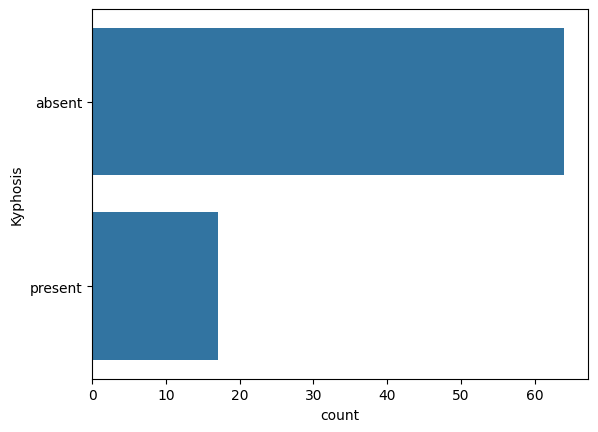

In [15]:
sns.countplot(data['Kyphosis'], label = 'Count')

In [16]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

labelencoder_y = LabelEncoder()

data['Kyphosis'] = labelencoder_y.fit_transform(data['Kyphosis'])




In [17]:
data['Kyphosis']

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [18]:
# Absent - no kyphosis after operation
data_false = data[data["Kyphosis"]==0]

In [19]:
data_false.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [23]:
print ('Disease absent after operation percentage = ' , (len(data_false)/len(data)) * 100 ,'%')

Disease absent after operation percentage =  79.01234567901234 %


In [24]:
# Disease kyphosis Present after the operation
data_true = data[data['Kyphosis']==1]

In [25]:
data_true.head()

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12


In [29]:
print ('Disease present after operation percentage = ' , (len(data_true)/len(data))*100, '%')

Disease present after operation percentage =  20.98765432098765 %


<Axes: >

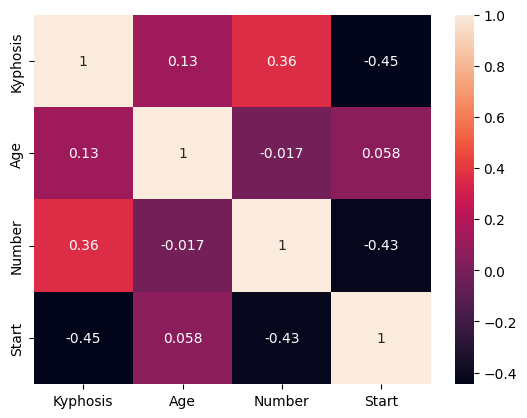

In [30]:
# Correlation 
sns.heatmap(data.corr(), annot = True)

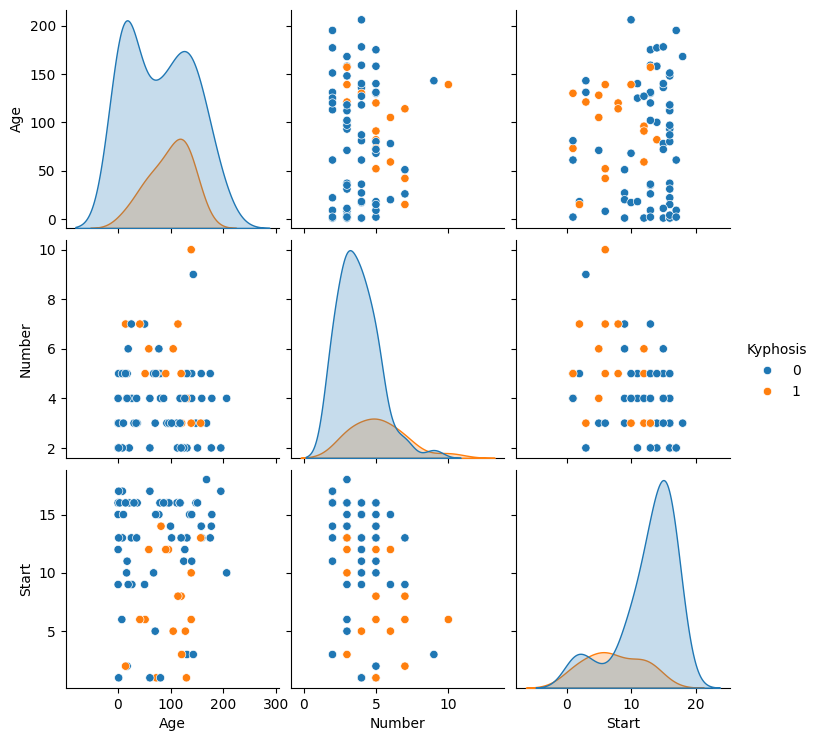

In [31]:
# Visualize 
sns.pairplot(data, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'])

In [32]:
data

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [36]:
X = data.drop(['Kyphosis'], axis =1)


In [37]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [38]:
y = data['Kyphosis']

In [39]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.3)

In [42]:
X_train.shape

(56, 3)

In [43]:
y_train.shape

(56,)

In [44]:
X_test.shape

(25, 3)

In [45]:
y_test.shape

(25,)

In [46]:
# Train a decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
y_predict_test = decision_tree.predict(X_test)

In [51]:
y_predict_test

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

In [52]:
y_test

14    0
60    1
78    0
68    0
16    0
48    1
19    0
31    0
26    0
24    1
74    0
62    0
69    0
6     0
12    0
37    1
27    0
59    0
61    1
43    0
58    0
47    0
46    0
45    1
0     0
Name: Kyphosis, dtype: int64

In [53]:
cm = confusion_matrix(y_test, y_predict_test)

<Axes: >

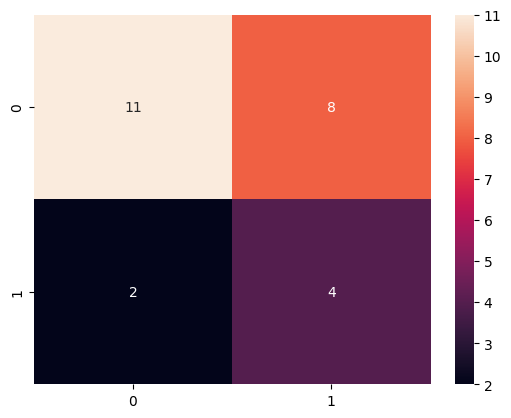

In [54]:
sns.heatmap(cm, annot = True)

In [55]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.58      0.69        19
           1       0.33      0.67      0.44         6

    accuracy                           0.60        25
   macro avg       0.59      0.62      0.57        25
weighted avg       0.72      0.60      0.63        25



In [56]:
#model 2
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [57]:
#predicting on test data
y_predict_test = RandomForest.predict(X_test)

<Axes: >

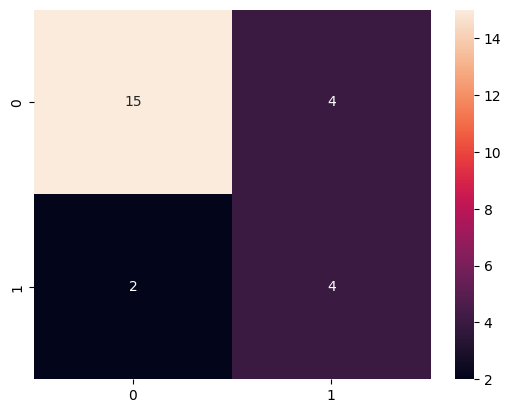

In [58]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [59]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.50      0.67      0.57         6

    accuracy                           0.76        25
   macro avg       0.69      0.73      0.70        25
weighted avg       0.79      0.76      0.77        25

